There was a but in Julia 1.5 to shut down long Jump process simulations.
For some reason, Julia 1.6 fixed the bug.

The code below reproduced the bug

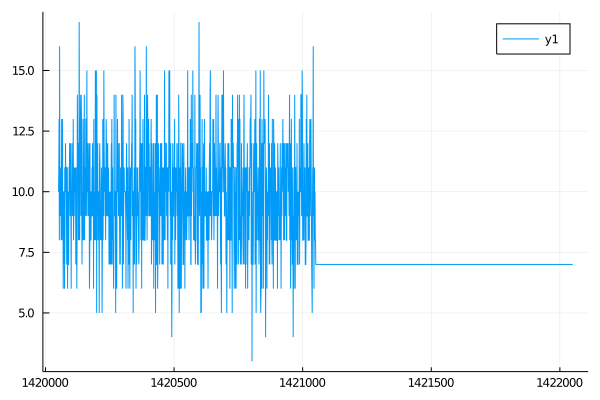

In [1]:
using DifferentialEquations, StochasticDiffEq, DiffEqJump, Catalyst, Plots, Random

Random.seed!(7777)

# model definition
model = @reaction_network begin
    100.0, ∅ --> A
    A, A --> ∅
end

# simulation
u0 = [0.0]
tspan = (0.0, 1e7)
dprob = DiscreteProblem(model, u0, tspan, nothing)
jprob = JumpProblem(model, dprob, Direct(), save_positions = (false, false))
sol = solve(jprob, SSAStepper(), saveat = 1.0)

# find freeze time
A = [u[1] for u in sol.u]
end_state = A[length(A)]
freeze_t = 0
for i = length(A):-1:1
    if A[i] != end_state
        global freeze_t = i
        break
    end
end

# plot
p_start = max(1, freeze_t - 1000)
p_end = min(length(A), freeze_t + 1000)
plot(sol.t[p_start:p_end], A[p_start:p_end])